## 1. Notebook Initialization

In [5]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from random import randint

In [6]:
# Opciones de pandas
rows, cols = 400, 100
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
# Rutas
PATH = "../../data/fundamental_data/"

## 2. Preliminar Tests

In [4]:
data = pd.read_csv(PATH+'IBM_PCA_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
#data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m'), inplace=True)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Prediction
1985-03,7.209340,-1.277433,-4.327074,0.744988,-0.531027,1.004126,-0.851989,0.255075,0.567930,0.358221,0.249011,-0.825895,-0.529244,-0.904615,0.108156,13.035309
1985-06,6.893940,-1.709273,-4.122886,0.839108,-0.084579,0.662230,-0.702346,0.412531,0.417298,0.335329,0.320465,-0.796355,-0.511677,-0.911772,0.053614,13.160484
1985-09,6.840612,-1.861249,-4.010557,0.853306,0.313719,0.373128,-0.606786,0.467951,0.294372,0.336179,0.442101,-0.763784,-0.365508,-1.040820,-0.006936,16.657703
1985-12,6.474170,-2.301664,-2.786799,0.813373,1.078394,-1.110566,0.165312,-0.661390,-0.011733,-1.538154,-1.748788,1.511953,2.094579,-2.148002,-0.488341,16.345213
1986-03,6.984757,-1.078512,-4.273619,0.965144,-0.481375,0.769691,-0.759288,0.313615,0.691866,0.534520,0.258234,-0.727637,-0.601165,-0.645276,0.301987,15.921562
1986-06,6.703357,-1.475482,-3.981249,1.041278,-0.050192,0.376266,-0.612618,0.401608,0.572831,0.521254,0.353652,-0.733017,-0.598664,-0.624598,0.291843,14.741072
1986-09,6.839550,-1.464323,-3.825255,1.003054,0.289928,0.137663,-0.445792,0.370006,0.541914,0.320909,0.680234,-0.660708,-0.283203,-0.492592,0.178491,13.267827
1986-12,6.667392,-1.620497,-2.577314,0.870116,1.241689,-1.467642,0.361518,-0.952107,0.198746,-1.781227,-1.992376,1.711574,2.398984,-1.761953,-0.342443,16.734827
1987-03,7.198027,-0.659948,-4.445436,0.929271,-0.476685,0.859010,-0.458682,0.259011,0.669047,0.543142,0.410577,-0.547864,-0.410874,-0.329028,0.352228,18.234604
1987-06,6.837969,-1.090749,-4.256983,1.012418,-0.040583,0.573919,-0.306082,0.369929,0.533837,0.619256,0.635799,-0.499934,-0.381354,-0.416362,0.341966,17.033018


## 2.1 No scaled y dataset evaluation

In [3]:
from lib.fundamental_lib import param_tuner
from sklearn.model_selection import ShuffleSplit
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
cv = ShuffleSplit(n_splits=10, test_size=0.2)
rf = GridSearchCV(RandomForestRegressor(bootstrap=True, n_jobs=-1, random_state=2021), n_jobs=-1, cv=cv,
                  param_grid = {
                        'n_estimators': [10, 20, 30, 40, 50, 100],
                        'max_depth': [3, None],
                        'max_features': ['auto', 'sqrt', 'log2'],
                        'oob_score': [True, False],
                        'min_samples_leaf': [1,2,3,4],
                      },
                  scoring='neg_root_mean_squared_error'
)
data = pd.read_csv(PATH+'Windowed_IBM_PCA_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
print(param_tuner(data,rf,scaling=False))

{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 30, 'oob_score': True}


In [ ]:
from lib.fundamental_lib import evaluate_estimator
from sklearn.model_selection import ShuffleSplit
Params={'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 20, 'oob_score': True}
rf = RandomForestRegressor(bootstrap=True, n_jobs=-1, random_state=2021, max_depth=Params['max_depth'], min_samples_leaf=Params['min_samples_leaf'], max_features=Params['max_features'], n_estimators=Params['n_estimators'], oob_score=Params['oob_score'])
cv = ShuffleSplit(n_splits=10, test_size=0.2)
evaluate_estimator('Windowed_{}_PCA_dataset.csv', PATH, rf, cv=cv, scaling=False)

## 2.2 Scaled y dataset evaluation

In [4]:
from lib.fundamental_lib import param_tuner
from sklearn.model_selection import ShuffleSplit
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
cv = ShuffleSplit(n_splits=10, test_size=0.2)
rf = GridSearchCV(RandomForestRegressor(bootstrap=True, n_jobs=-1, random_state=2021), n_jobs=-1, cv=cv,
                  param_grid = {
                        'n_estimators': [10, 20, 30, 40, 50, 100],
                        'max_depth': [3, None],
                        'max_features': ['auto', 'sqrt', 'log2'],
                        'oob_score': [True, False],
                        'min_samples_leaf': [1,2,3,4],
                      },
                  scoring='neg_root_mean_squared_error'
)
data = pd.read_csv(PATH+'Windowed_IBM_PCA_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
print(param_tuner(data,rf,scaling=True))

{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 50, 'oob_score': False}


In [ ]:
from lib.fundamental_lib import evaluate_estimator
from sklearn.model_selection import ShuffleSplit
Params={'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 20, 'oob_score': True}
rf = RandomForestRegressor(bootstrap=True, n_jobs=-1, random_state=2021, max_depth=Params['max_depth'], min_samples_leaf=Params['min_samples_leaf'], max_features=Params['max_features'], n_estimators=Params['n_estimators'], oob_score=Params['oob_score'])
cv = ShuffleSplit(n_splits=10, test_size=0.2)
evaluate_estimator('Windowed_{}_PCA_dataset.csv', PATH, rf, cv=cv, scaling=True)

## 3.0 Model testing settings

In [7]:
from lib.fundamental_lib import make_dict
datas = make_dict('Windowed_{}_PCA_dataset.csv', PATH)

## 3.1 Random split - No scaled prediction variable

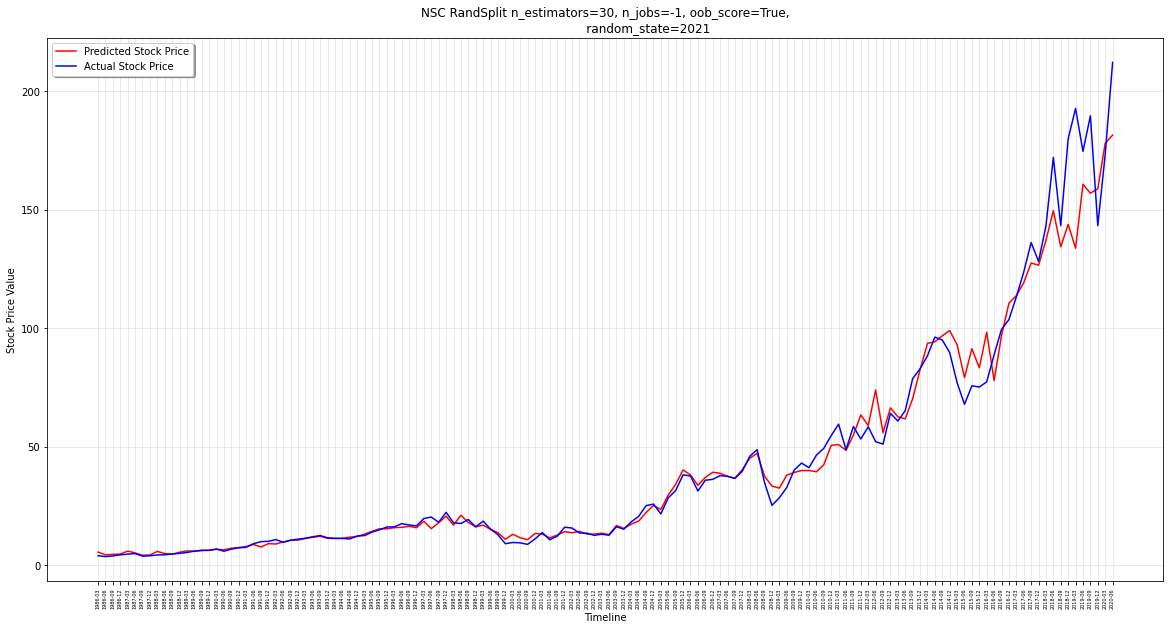

NSC MODEL RESULTS
 RMSE
 	Test: 15.934816898064007
 MAPE
 	Test: 0.17450049362242984
 MAE
 	Test: 8.249258477063409
 R2 Score Adj
 	Test: 1.0664493199875542



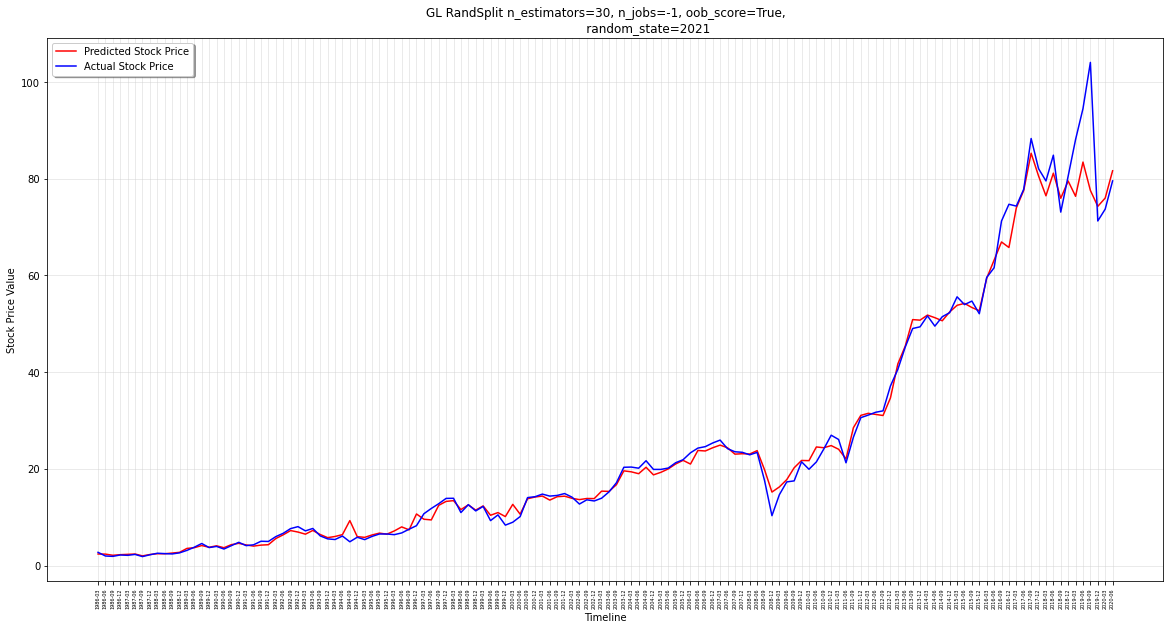

GL MODEL RESULTS
 RMSE
 	Test: 5.906395698689396
 MAPE
 	Test: 0.12864358036876716
 MAE
 	Test: 2.584629478624889
 R2 Score Adj
 	Test: 1.0340538722800712



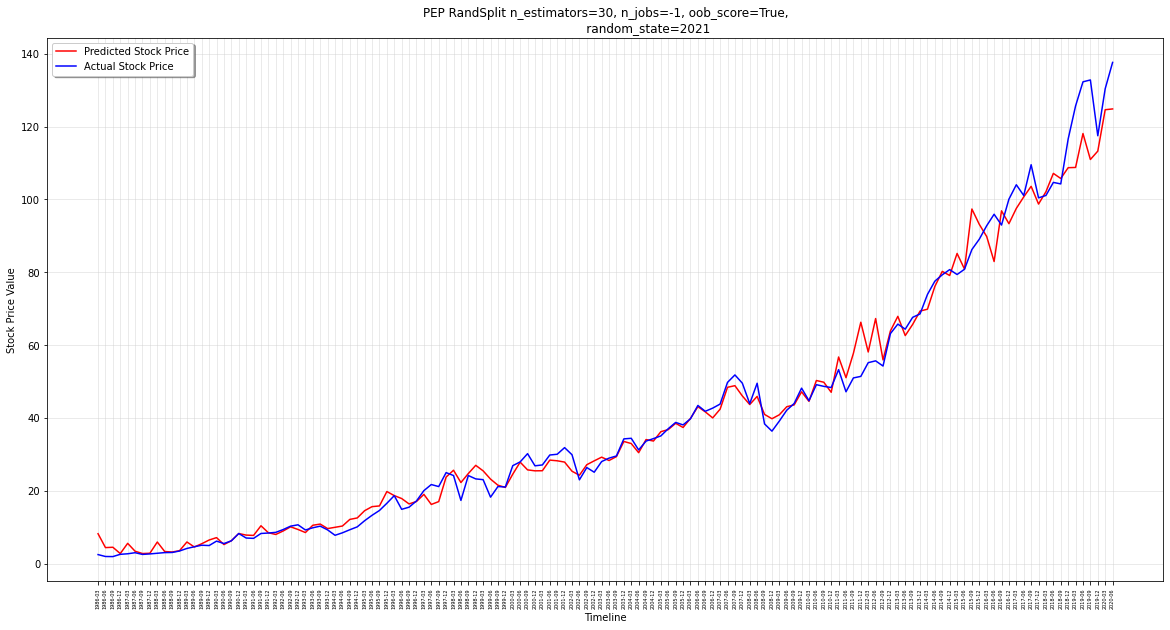

PEP MODEL RESULTS
 RMSE
 	Test: 7.029512975019906
 MAPE
 	Test: 0.3073937654575864
 MAE
 	Test: 4.51520277772631
 R2 Score Adj
 	Test: 1.0253481061415843



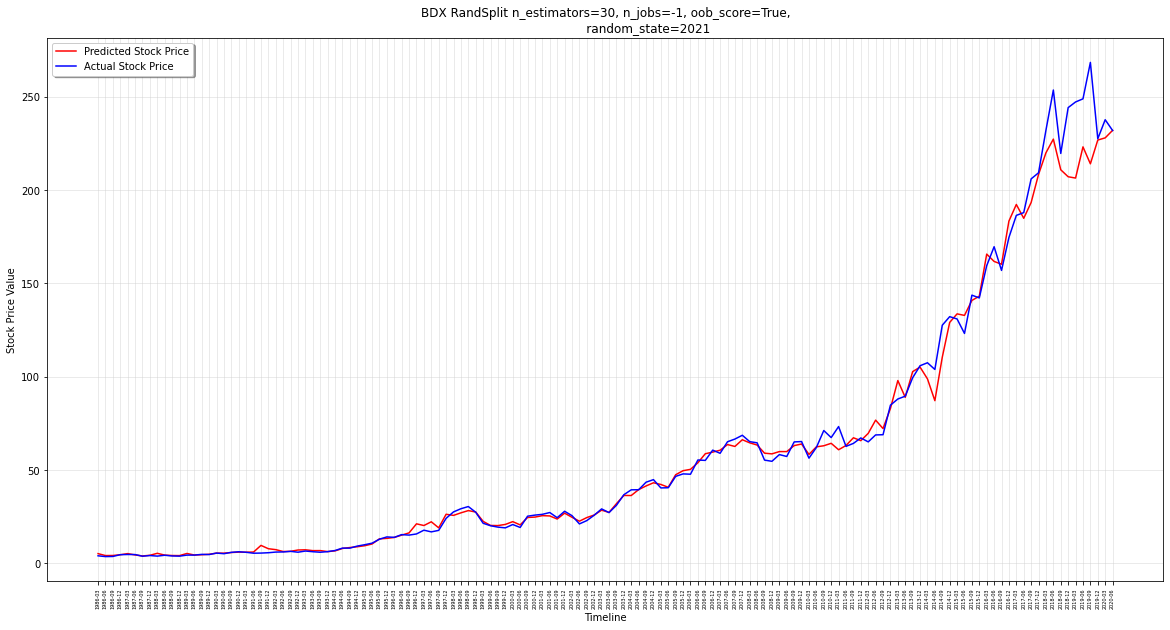

BDX MODEL RESULTS
 RMSE
 	Test: 15.330606426581996
 MAPE
 	Test: 0.1694204434280511
 MAE
 	Test: 7.779773710455211
 R2 Score Adj
 	Test: 1.0298520546266658



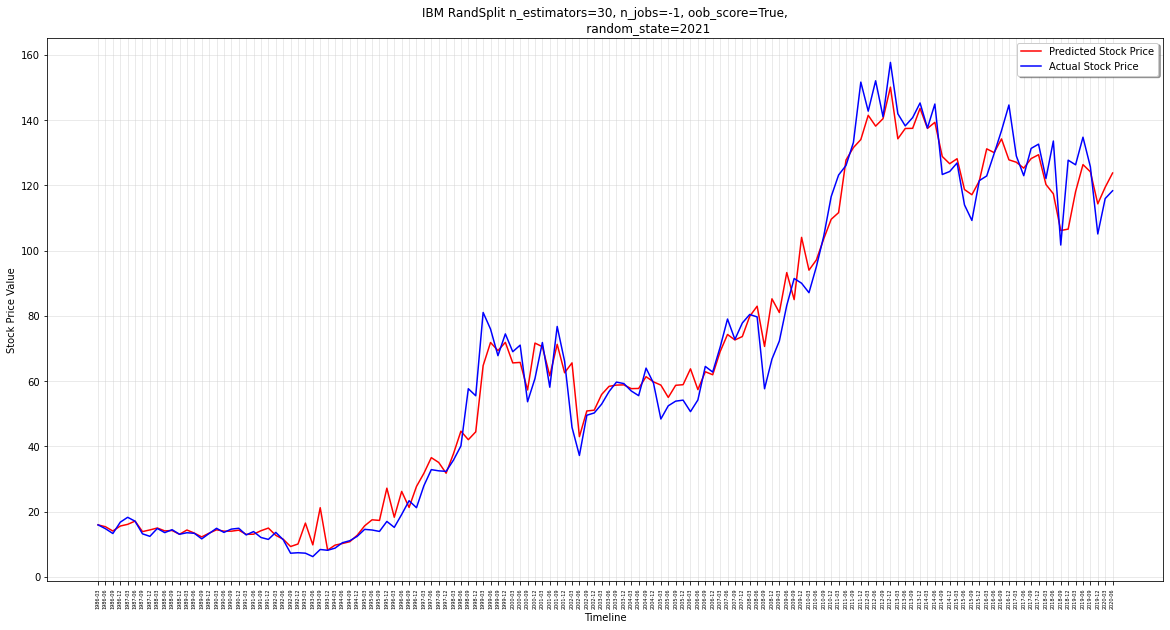

IBM MODEL RESULTS
 RMSE
 	Test: 9.607689857198391
 MAPE
 	Test: 0.20552437693383668
 MAE
 	Test: 7.059775286629085
 R2 Score Adj
 	Test: 1.025386865451087



In [8]:
from lib.fundamental_lib import model_results_revised
#Best Params
Params={'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 30, 'oob_score': True}
rf = RandomForestRegressor(bootstrap=True, n_jobs=-1, random_state=2021, max_depth=Params['max_depth'], min_samples_leaf=Params['min_samples_leaf'], max_features=Params['max_features'], n_estimators=Params['n_estimators'], oob_score=Params['oob_score'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'Windowed_{}_PCA_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_revised(datas[stock], rf, label=stock, scaling=False, start='1986-03')

## 3.2 Random split - Scaled prediction variable

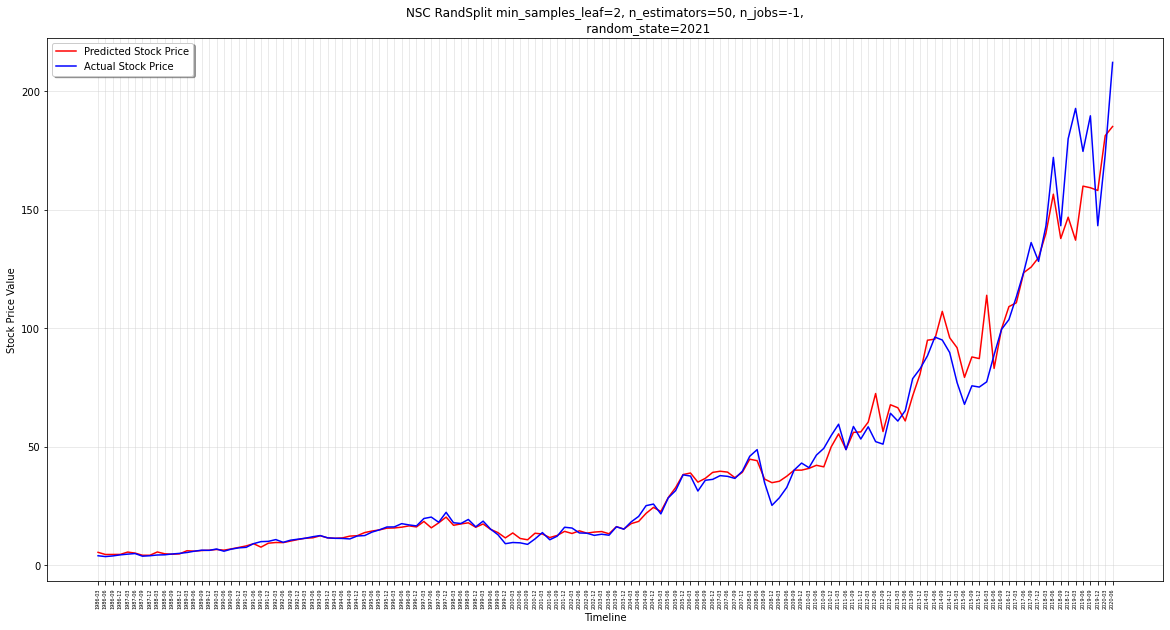

NSC MODEL RESULTS
 RMSE
 	Test: 15.893428071296691
 MAPE
 	Test: 0.16821908934103896
 MAE
 	Test: 8.127101952681675
 R2 Score Adj
 	Test: 1.0661045795776107



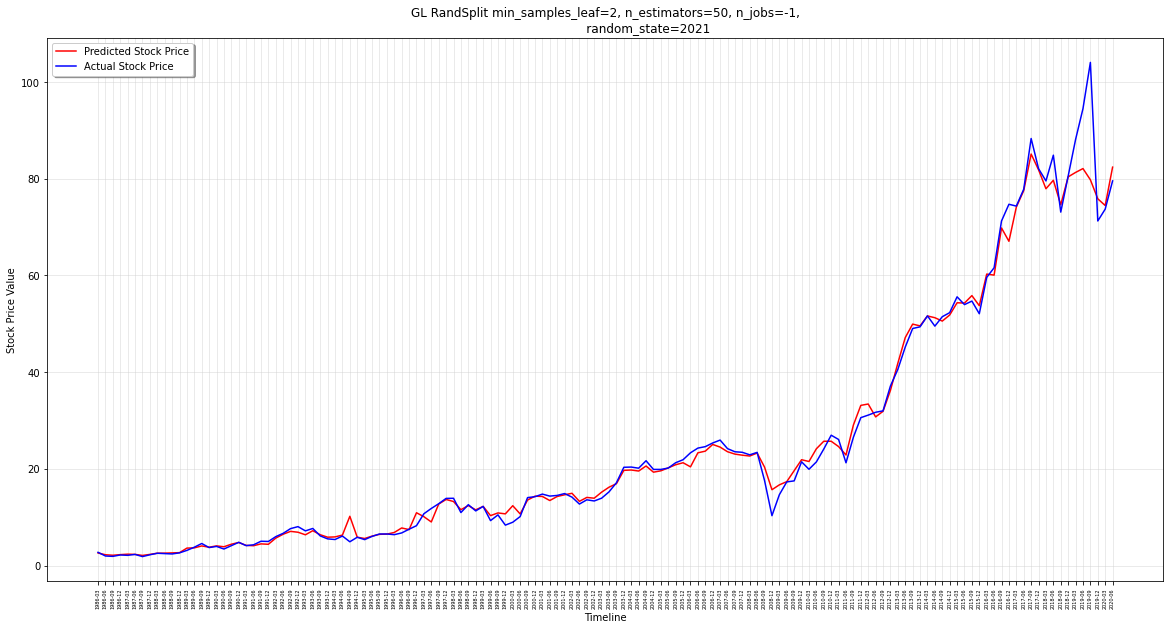

GL MODEL RESULTS
 RMSE
 	Test: 5.256233493967809
 MAPE
 	Test: 0.13528326308571942
 MAE
 	Test: 2.4677810251904018
 R2 Score Adj
 	Test: 1.0269693651398022



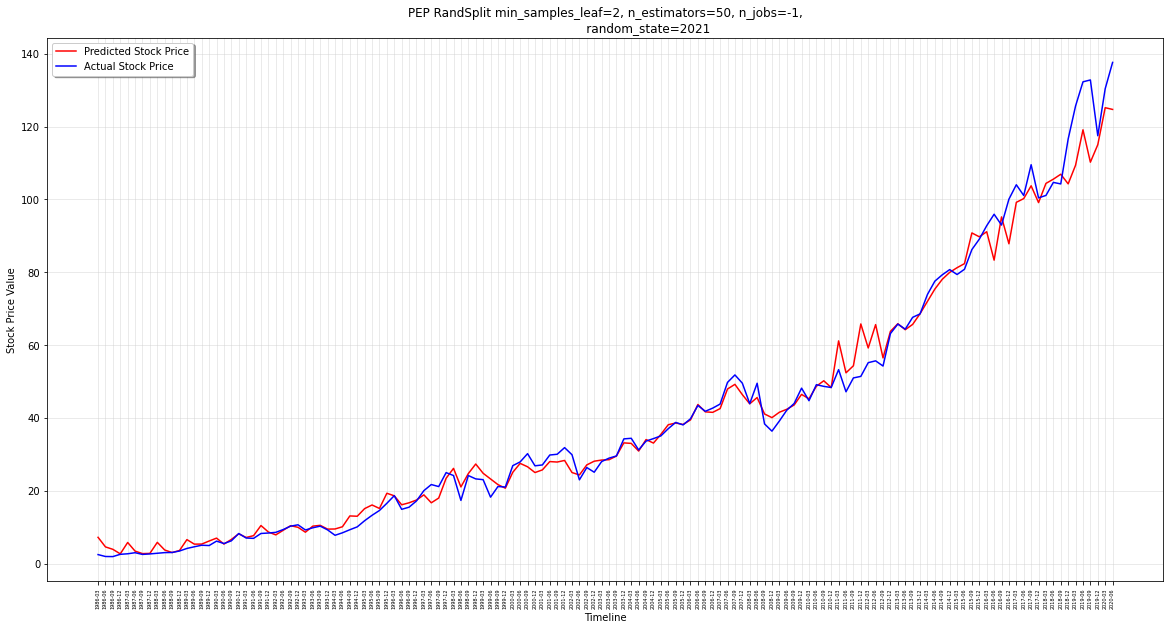

PEP MODEL RESULTS
 RMSE
 	Test: 7.505254666407886
 MAPE
 	Test: 0.3028769791443365
 MAE
 	Test: 4.886820228575039
 R2 Score Adj
 	Test: 1.0288952136276555



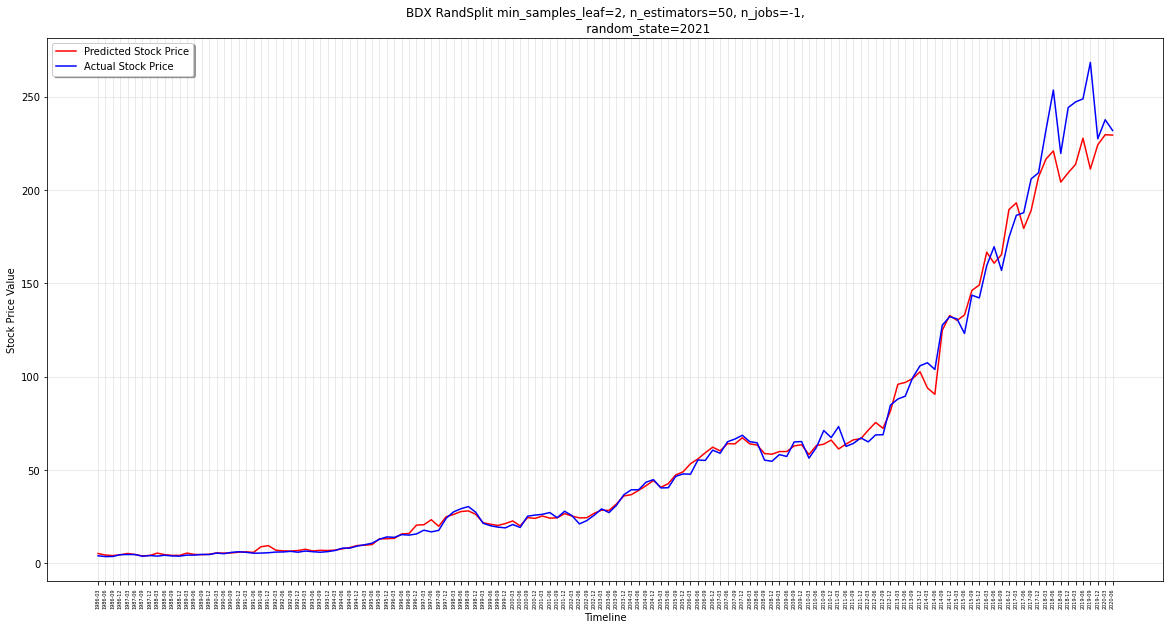

BDX MODEL RESULTS
 RMSE
 	Test: 15.01704023774443
 MAPE
 	Test: 0.18320065082471412
 MAE
 	Test: 7.800830087075496
 R2 Score Adj
 	Test: 1.0286433788864058



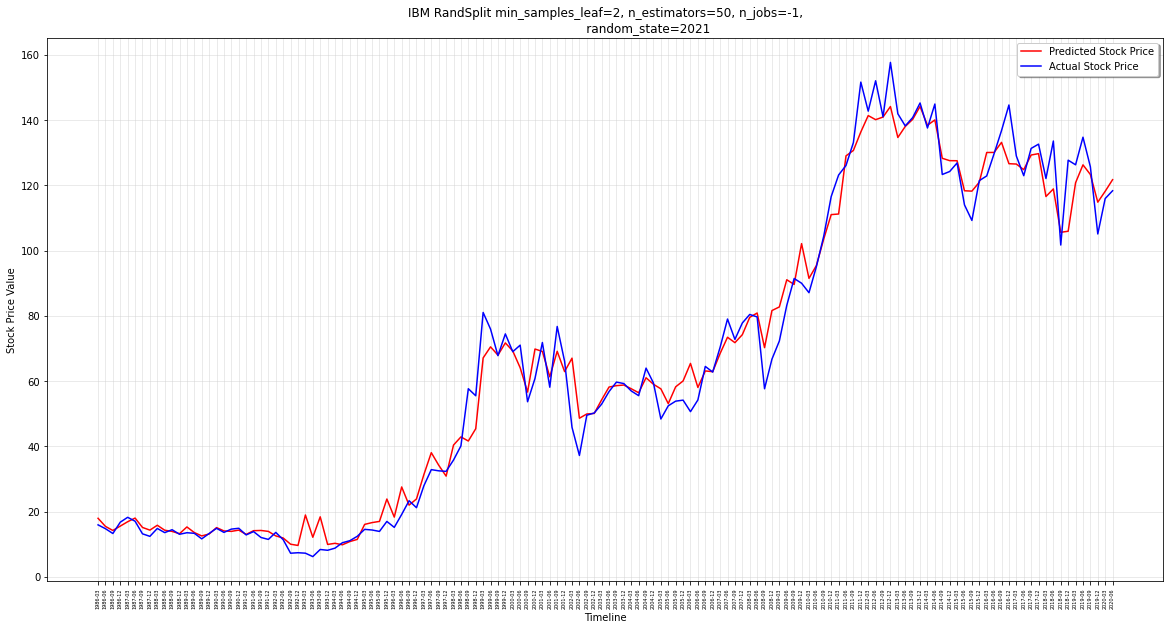

IBM MODEL RESULTS
 RMSE
 	Test: 9.45394296327708
 MAPE
 	Test: 0.2049247315804348
 MAE
 	Test: 6.793906765662008
 R2 Score Adj
 	Test: 1.0245808607387055



In [10]:
from lib.fundamental_lib import model_results_revised
#Best Params
Params={'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 50, 'oob_score': False}
rf = RandomForestRegressor(bootstrap=True, n_jobs=-1, random_state=2021, max_depth=Params['max_depth'], min_samples_leaf=Params['min_samples_leaf'], max_features=Params['max_features'], n_estimators=Params['n_estimators'], oob_score=Params['oob_score'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'Windowed_{}_PCA_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_revised(datas[stock], rf, label=stock, scaling=True, start='1986-03')

## 3.3 Sequential split - No scaled prediction variable

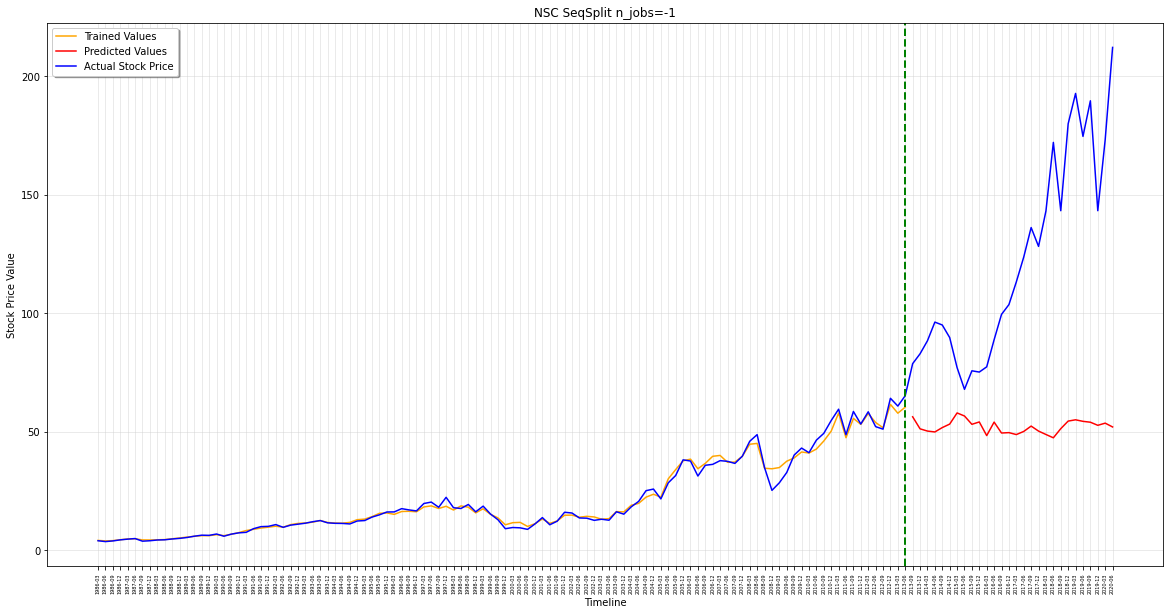

NSC MODEL RESULTS
 RMSE
 	Train: 1.836485031909489
 	Test: 87.50698700573368
 	Dataset: 40.003390590992424
 MAPE
 	Train: 0.05303372584977859
 	Test: 0.5281283883677438
 	Dataset: 0.15215419500820299
 R2 Score Adj
 	Train: 0.9724920100314071
 	Test: 4.075508975168544
 	Dataset: -0.14390322587124071



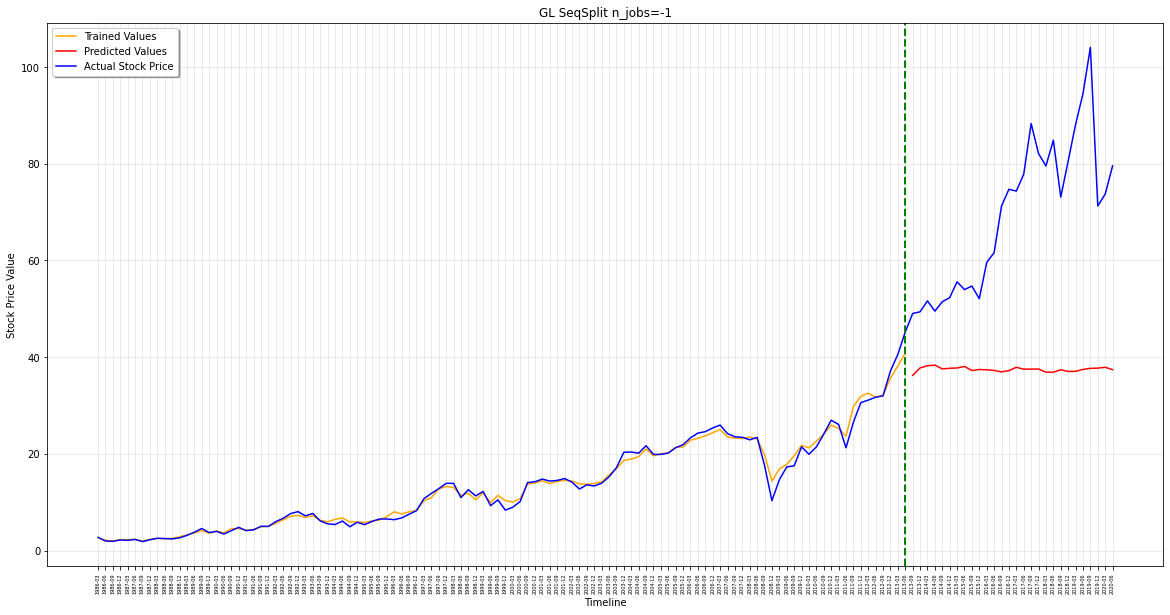

GL MODEL RESULTS
 RMSE
 	Train: 1.0256443750951592
 	Test: 36.24051080372209
 	Dataset: 16.578476593928244
 MAPE
 	Train: 0.05546815807156665
 	Test: 0.43630502595781845
 	Dataset: 0.1349233319471156
 R2 Score Adj
 	Train: 0.9736130488759258
 	Test: 5.616388602872267
 	Dataset: 0.25059095169600754



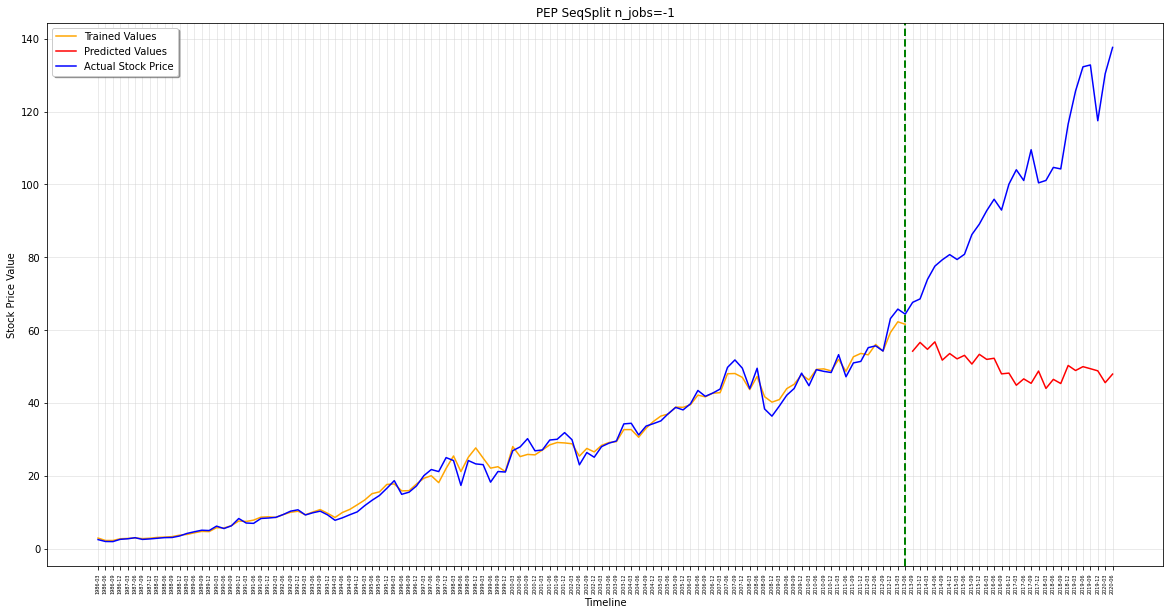

PEP MODEL RESULTS
 RMSE
 	Train: 1.5854589236090741
 	Test: 56.2779516893353
 	Dataset: 25.744389951693794
 MAPE
 	Train: 0.05701573012244863
 	Test: 0.4777548955521148
 	Dataset: 0.14479584377324228
 R2 Score Adj
 	Train: 0.981631159706424
 	Test: 7.0463312704069985
 	Dataset: 0.08391612399009685



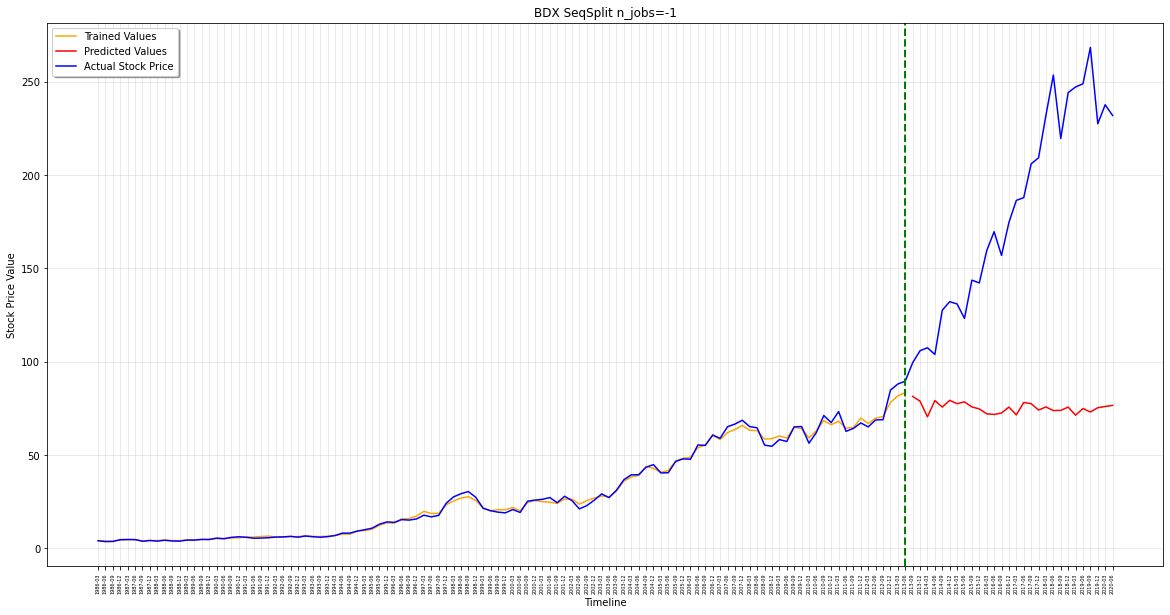

BDX MODEL RESULTS
 RMSE
 	Train: 1.7430700677460746
 	Test: 121.05961304072899
 	Dataset: 55.31737596555201
 MAPE
 	Train: 0.042902958988735466
 	Test: 0.5458249070794416
 	Dataset: 0.14782912082060942
 R2 Score Adj
 	Train: 0.9888087220111166
 	Test: 5.514627731086521
 	Dataset: -0.08940708026626676



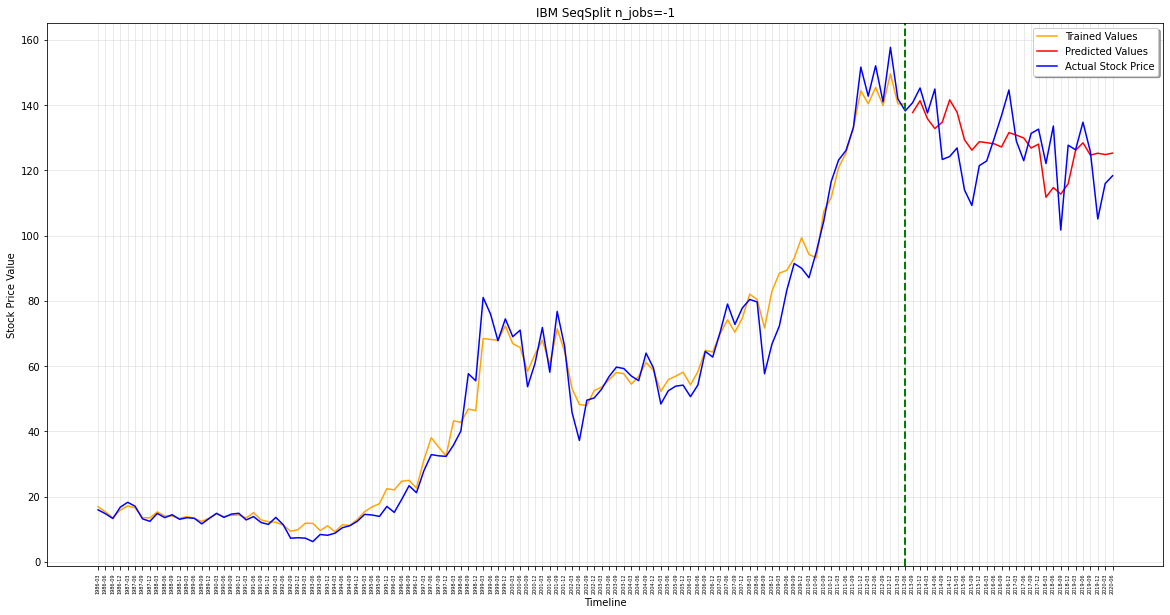

IBM MODEL RESULTS
 RMSE
 	Train: 4.593687698025684
 	Test: 10.186607286432169
 	Dataset: 6.192626391364861
 MAPE
 	Train: 0.09114161192505792
 	Test: 0.06951217848236184
 	Dataset: 0.08662899631471126
 R2 Score Adj
 	Train: 0.9698954691400725
 	Test: 1.7621884308126896
 	Dataset: 0.9693887607160641



In [10]:
from lib.fundamental_lib import model_results_seq
#Best Params
Params={'max_features': 'auto', 'n_estimators': 100}
rf = RandomForestRegressor(bootstrap=True, n_jobs=-1, max_features=Params['max_features'], n_estimators=Params['n_estimators'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'Windowed_{}_PCA_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_seq(data, rf, label=stock, scaling=False, start='1986-03')

## 3.4 Sequential split - Scaled prediction variable

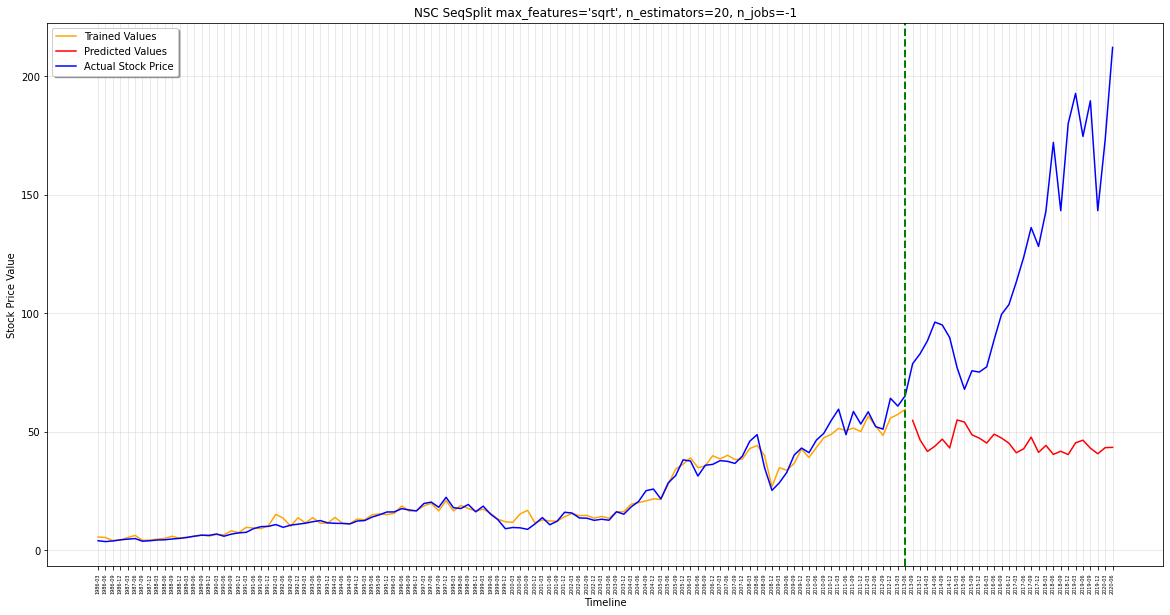

NSC MODEL RESULTS
 RMSE
 	Train: 2.556152971856177
 	Test: 94.18307326762549
 	Dataset: 43.079466339688786
 MAPE
 	Train: 0.10069380437421416
 	Test: 0.583125816251341
 	Dataset: 0.20134508742771548
 R2 Score Adj
 	Train: 0.9467085236123366
 	Test: 4.562683584890804
 	Dataset: -0.3265887465186339



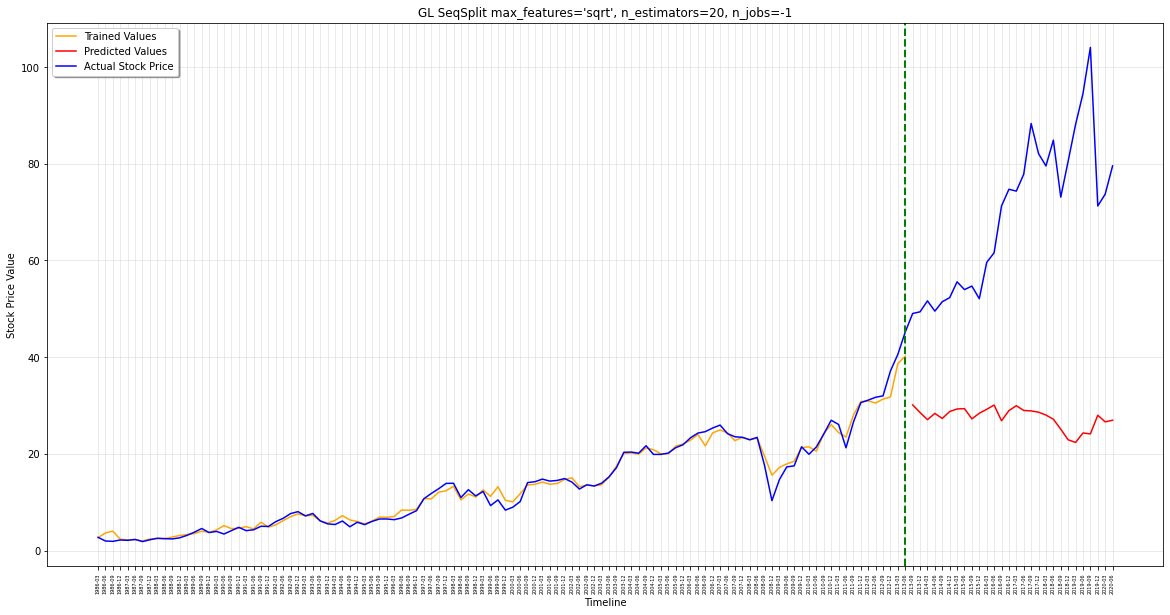

GL MODEL RESULTS
 RMSE
 	Train: 1.2640306691402174
 	Test: 45.76636841670027
 	Dataset: 20.934637737718067
 MAPE
 	Train: 0.08760215192706763
 	Test: 0.5823684364700684
 	Dataset: 0.19082677244323332
 R2 Score Adj
 	Train: 0.9599215580329952
 	Test: 8.362183604939611
 	Dataset: -0.1949798759743384



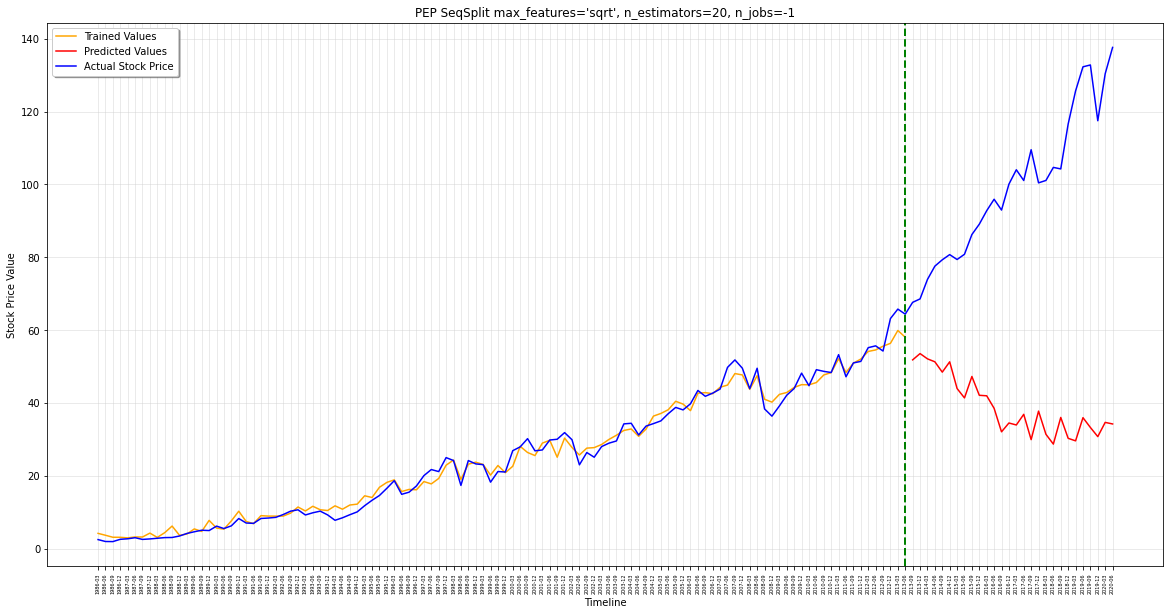

PEP MODEL RESULTS
 RMSE
 	Train: 2.0846330908216872
 	Test: 68.09634697237091
 	Dataset: 31.159174558247116
 MAPE
 	Train: 0.11617518130981291
 	Test: 0.5831719404644586
 	Dataset: 0.21360615983848003
 R2 Score Adj
 	Train: 0.9682436190228926
 	Test: 9.85244022428981
 	Dataset: -0.34196725057164445



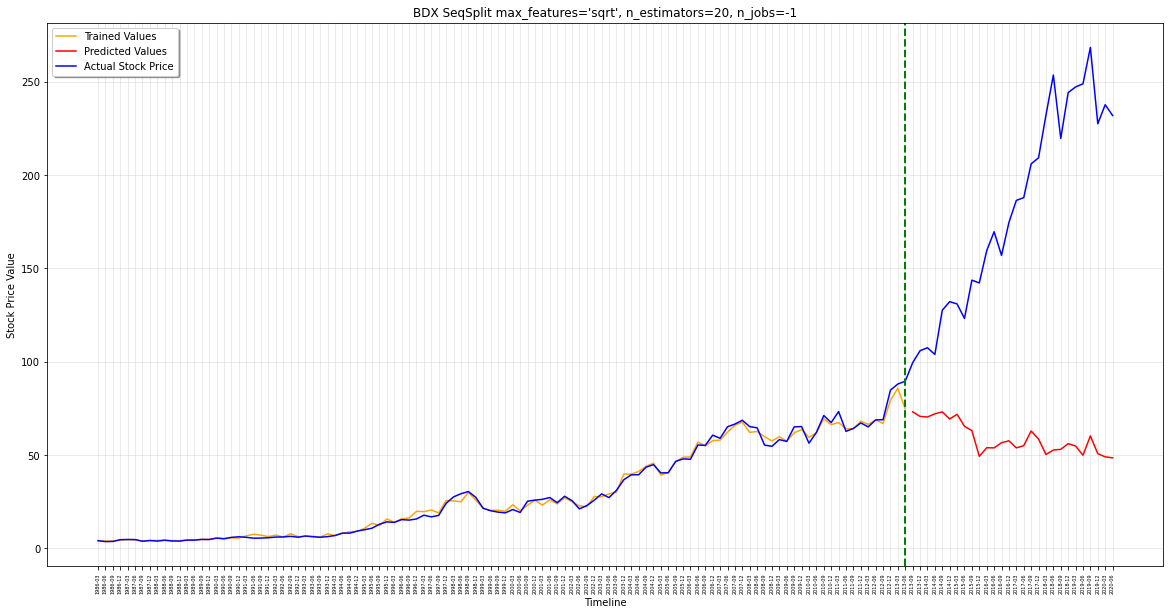

BDX MODEL RESULTS
 RMSE
 	Train: 2.219189529449964
 	Test: 138.5392006257512
 	Dataset: 63.31046723946771
 MAPE
 	Train: 0.057906124057801114
 	Test: 0.6344978442670385
 	Dataset: 0.17820223834605925
 R2 Score Adj
 	Train: 0.9818599373522476
 	Test: 6.912467098076363
 	Dataset: -0.42698066748835006



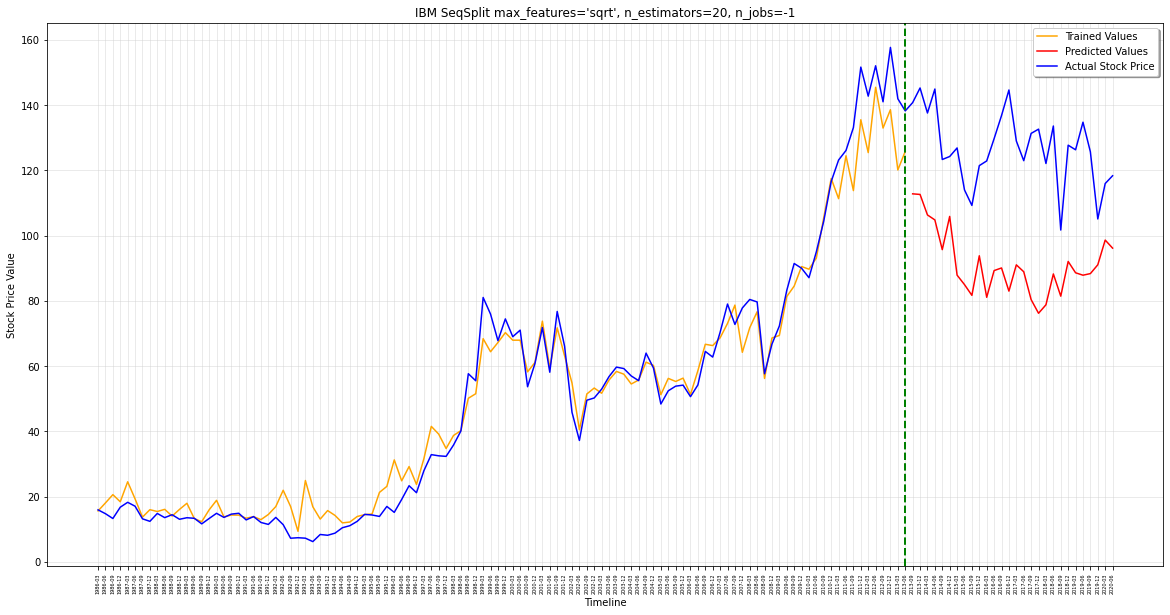

IBM MODEL RESULTS
 RMSE
 	Train: 6.589607212717035
 	Test: 37.40258242316552
 	Dataset: 18.061876767709446
 MAPE
 	Train: 0.18089052515177248
 	Test: 0.2784918289549031
 	Dataset: 0.20125338709631055
 R2 Score Adj
 	Train: 0.938051900437979
 	Test: 11.275581366175173
 	Dataset: 0.7395904522463566



In [12]:
from lib.fundamental_lib import model_results_seq
#Best Params
Params={'max_features': 'sqrt', 'n_estimators': 20}
rf = RandomForestRegressor(bootstrap=True, n_jobs=-1, max_features=Params['max_features'], n_estimators=Params['n_estimators'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'Windowed_{}_PCA_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_seq(data, rf, label=stock, scaling=True, start='1986-03')